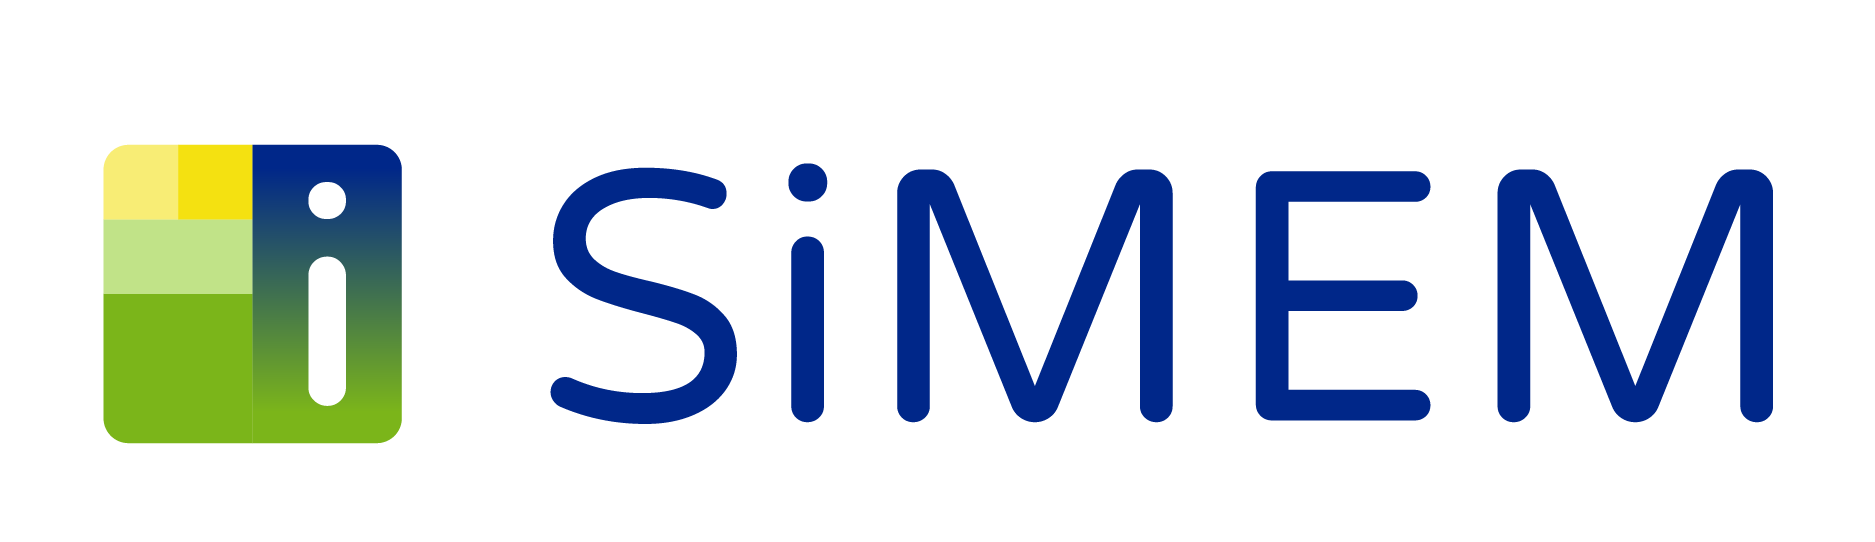

[SiMEM](https://www.simem.co/)

## Caso de uso - Valores del Cargo por Confiabilidad y Resultados de las Subastas de Reconfiguración

# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto
 
**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)

<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# import sys
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías

In [2]:
# Importación de librerías necesarias para la consulta y análisis de datos
from pydataxm.pydatasimem import ReadSIMEM  # Importa clases para interactuar con datos del sistema SIMEM, utilizado para acceder a información energética en Colombia
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame, muy útil para limpiar, transformar y explorar datos
import plotly.graph_objects as go           # Módulo de Plotly para crear visualizaciones interactivas y personalizadas, como gráficos de líneas, barras, áreas, etc.
import matplotlib.pyplot as plt             # Para crear gráficos estáticos como barras, líneas, histogramas, etc.

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo los conjuntos a presentar son [Valores del Cargo por Confiabilidad](https://www.simem.co/datadetail/135C1099-3F6A-4978-938C-4DDD4C3571BF) y [Resultados de las Subastas de Reconfiguración](https://www.simem.co/datadetail/3856138A-66B9-427F-BFF6-A116DC441A54).

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [3]:
id_dataset_CxC = '135c10'                                           # ID del conjunto de datos a consultar
fecha_inicial = '2021-01-01'                                        # Fecha de inicio del rango de consulta
fecha_final = '2027-12-31'                                          # Fecha de fin del rango de consulta
simem_CxC = ReadSIMEM(id_dataset_CxC, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_CxC = simem_CxC.main()                                           # Ejecución del método principal para obtener los datos en un DataFrame
display(df_CxC.head(5))                                             # Visualización de las primeras 5 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Valores del Cargo por Confiabilidad"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0012488365173339844
Extraccion de registros: 4.795195817947388
End of data extracting process
****************************************************************************************************


,FechaPublicacion,FechaSubasta,Subasta,TipoSubasta,DescripcionSubasta,FechaInicioSubasta,FechaFinSubasta,PrecioCierre,IPPUSABase,IPPUSADeflactor,PrecioActualizado,CodigoSICAgente,CodigoPlanta,FechaInicioObligacion,FechaFinObligacion,OEFDiaria
0,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,DECIMO OCTAVA SUBASTA,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EMGG,ZPA4,2025-12-01,2026-11-30,1115364
1,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,DECIMO OCTAVA SUBASTA,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EMGG,ZPA3,2025-12-01,2026-11-30,1075025
2,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,DECIMO OCTAVA SUBASTA,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EITG,PES1,2025-12-01,2026-11-30,1667742
3,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,DECIMO OCTAVA SUBASTA,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EGCG,TEC1,2025-12-01,2026-11-30,4505074
4,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,DECIMO OCTAVA SUBASTA,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EEBG,GVIO,2025-12-01,2026-11-30,11305120


In [4]:
id_dataset_rSubastas = '385613'                                                 # ID del conjunto de datos a consultar
fecha_inicial = '2021-01-01'                                                    # Fecha de inicio del rango de consulta
fecha_final = '2027-12-31'                                                      # Fecha de fin del rango de consulta
simem_rSubastas = ReadSIMEM(id_dataset_rSubastas, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_rSubastas = simem_rSubastas.main()                                           # Ejecución del método principal para obtener los datos en un DataFrame
display(df_rSubastas.head(5))                                                   # Visualización de las primeras 5 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Resultados de las Subastas de Reconfiguración"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.002341747283935547
Extraccion de registros: 1.9630188941955566
End of data extracting process
****************************************************************************************************


,FechaPublicacion,FechaSubasta,Subasta,FechaInicioSubasta,FechaFinSubasta,PrecioCierre,IPPUSABase,IPPUSADeflactor,PrecioActualizado,CodigoSICAgente,CodigoPlanta,Tecnologia,FechaInicioObligacion,FechaFinObligacion,Concepto,ValorConcepto
0,2025-05-09,2025-04-21,SUBASTA DE RECONFIGURACION DE COMPRA 2025-2026,2025-12-01,2026-11-30,21300.0,222.231003,222.231003,21300.0,EMUG,PSUA,Solar,2025-04-21,2025-12-01,Diaria (kWh-día),70.561
1,2025-05-23,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2025-2026,2025-12-01,2026-11-30,21.3,223.516998,223.516998,21.3,EPMG,PRC3,Hidraulica,2025-12-01,2026-11-30,Diaria (kWh-dia),447650.000
2,2025-05-23,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2025-2026,2025-12-01,2026-11-30,21.3,223.516998,223.516998,21.3,SLMG,MATA,Solar,2025-12-01,2026-11-30,Diaria (kWh-dia),100730.000
3,2025-05-23,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2025-2026,2025-12-01,2026-11-30,21.3,223.516998,223.516998,21.3,SLUG,3IZ6,Solar,2025-12-01,2026-11-30,Diaria (kWh-dia),146160.000
4,2025-05-23,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2025-2026,2025-12-01,2026-11-30,21.3,223.516998,223.516998,21.3,TBSG,TBST,Termica,2025-12-01,2026-11-30,Diaria (kWh-dia),960385.000


También se leerá el Dataset de plantas para poder cruzar esta información con las subastas

In [5]:
id_dataset_plantas = '0BFC9D'                                               # ID del conjunto de datos a consultar
fecha_inicial = '2025-01-01'                                                # Fecha de inicio del rango de consulta
fecha_final = '2025-07-31'                                                  # Fecha de fin del rango de consulta
simem_plantas = ReadSIMEM(id_dataset_plantas, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_plantas = simem_plantas.main()                                           # Ejecución del método principal para obtener los datos en un DataFrame
df_plantas

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Parámetros técnicos de las plantas de generación"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.00047087669372558594
Extraccion de registros: 19.976813554763794
End of data extracting process
****************************************************************************************************


,Fecha,CodigoDuracion,FechaPublicacion,CodigoPlanta,NombrePlanta,CodigoSICAgente,CapEfectivaNeta,FPO,CodigoSubAreaOperativa,CodigoAreaOperativa,TipoDespachoRecurso,TipoClasificacion,TipoGeneracion
0,2025-01-31,P1D,2025-01-31,2R22,LAGUNETA,ENDG,18000.0,2014-12-17,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
1,2025-01-31,P1D,2025-01-31,SNT1,SANTA ANA,ENDG,8000.0,2005-06-09,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
2,2025-01-31,P1D,2025-01-31,2S8N,GUAVIO MENOR,ENDG,9900.0,2016-04-27,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
3,2025-01-31,P1D,2025-01-31,2UPJ,TEQUENDAMA 1,ENDG,14200.0,2018-04-03,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
4,2025-01-31,P1D,2025-01-31,USQ1,USAQUEN,ENDG,1800.0,2013-04-15,Are0017,Are0056,No Despachado Centralmente,GENERADOR,Hidraulica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69226,2025-07-01,P1D,2025-07-01,PNC1,COGENERADOR PROENCA,PECG,19900.0,2014-04-29,Are0019,Are0128,No Despachado Centralmente,COGENERADOR,Termica
69227,2025-07-01,P1D,2025-07-01,INC1,INCAUCA 1,NTCG,60000.0,1998-10-21,Are0019,Are0128,No Despachado Centralmente,COGENERADOR,Termica
69228,2025-07-01,P1D,2025-07-01,4WWY,GD SAN MARTIN,EMSG,990.0,2025-05-11,Are0027,Are0056,No Despachado Centralmente,GENERADOR DISTRIBUIDO,Solar
69229,2025-07-01,P1D,2025-07-01,4Y5T,GD SAN MARTIN III,EMSG,990.0,2025-06-15,Are0027,Are0056,No Despachado Centralmente,GENERADOR DISTRIBUIDO,Solar


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

Los dataframes se filtarán para tener los datos necesarios para la visualización.

In [6]:
df_rSubastas = df_rSubastas.rename(columns={'ValorConcepto': 'OEFDiaria'})              # Se renombra la columna ValorConcepto para que coincida en el momento de unir los DataFrames
df_rSubastas['TipoSubasta'] = 'Subastas de reconfiguración de compra'                   # Se añade valores a la columna tipo de subasta

columnas_comunes = df_CxC.columns.intersection(df_rSubastas.columns)                    # Columnas comunes de los 2 DataFrames

df_CxC_filtrado = df_CxC[columnas_comunes]                                              # Se filtra el primer DataFrame con las columnas comunes
df_rSubastas_filtrado = df_rSubastas[columnas_comunes]                                  # Se filtra el segundo DataFrame con las columnas comunes

df_completo = pd.concat([df_CxC_filtrado, df_rSubastas_filtrado], ignore_index=True)    # Se unen los DataFrames
df_completo                                                                             # Se muestra el DataFrame resultado

,FechaPublicacion,FechaSubasta,Subasta,TipoSubasta,FechaInicioSubasta,FechaFinSubasta,PrecioCierre,IPPUSABase,IPPUSADeflactor,PrecioActualizado,CodigoSICAgente,CodigoPlanta,FechaInicioObligacion,FechaFinObligacion,OEFDiaria
0,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EMGG,ZPA4,2025-12-01,2026-11-30,1115364.0
1,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EMGG,ZPA3,2025-12-01,2026-11-30,1075025.0
2,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EITG,PES1,2025-12-01,2026-11-30,1667742.0
3,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EGCG,TEC1,2025-12-01,2026-11-30,4505074.0
4,2023-09-30,2019-02-01,DECIMO OCTAVA SUBASTA,Asignación administrada,2025-12-01,2026-11-30,15.1,176.800003,219.201996,18.72,EEBG,GVIO,2025-12-01,2026-11-30,11305120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2025-05-23,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2026-2027,Subastas de reconfiguración de compra,2026-12-01,2027-11-30,21.3,223.516998,223.516998,21.30,ENDG,3DDT,2026-12-01,2027-11-30,199528.0
2044,2025-05-23,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2026-2027,Subastas de reconfiguración de compra,2026-12-01,2027-11-30,21.3,223.516998,223.516998,21.30,EGCG,TEC1,2026-12-01,2027-11-30,154143.0
2045,2025-05-23,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2026-2027,Subastas de reconfiguración de compra,2026-12-01,2027-11-30,21.3,223.516998,223.516998,21.30,CHCG,SNFR,2026-12-01,2027-11-30,10695.0
2046,2025-05-23,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2026-2027,Subastas de reconfiguración de compra,2026-12-01,2027-11-30,21.3,223.516998,223.516998,21.30,CHCG,ESMR,2026-12-01,2027-11-30,7027.0


In [7]:
df_completo = df_completo.sort_values('FechaPublicacion', ascending=False)          # Se ordena por FechaPublicacion descendente

df_completo = df_completo.drop_duplicates(subset=[
    'CodigoPlanta', 'FechaInicioObligacion', 
    'FechaFinObligacion', 'FechaSubasta'], keep='first').reset_index(drop=True)     # Se eliminan los duplicados manteniendo el más reciente por grupo

df_completo["TipoSubasta"] = df_completo["TipoSubasta"].replace({
    "PRORRDOCOM": "Asignación administrada"                                         # Se estandarizan nombres de tipo subasta
})

df_completo                                                                         # Se muestra el DataFrame con los registros más recientes

,FechaPublicacion,FechaSubasta,Subasta,TipoSubasta,FechaInicioSubasta,FechaFinSubasta,PrecioCierre,IPPUSABase,IPPUSADeflactor,PrecioActualizado,CodigoSICAgente,CodigoPlanta,FechaInicioObligacion,FechaFinObligacion,OEFDiaria
0,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,ENDG,EPFV,2027-12-01,2028-11-30,189739.0
1,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,SLMG,MATA,2027-12-01,2028-11-30,100730.0
2,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,CHBG,CHBG,2027-12-01,2028-11-30,741.0
3,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,CRLG,CTG2,2027-12-01,2028-11-30,669833.0
4,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,ENDG,3DDT,2027-12-01,2028-11-30,199528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2023-02-01,2019-02-01,TOMADORES DEL CARGO PERIODO 2025-2035,Tomadores del Cargo,2025-12-01,2035-11-30,9.0,176.800003,219.201996,11.16,SLUG,3IZ6,2031-12-01,2032-11-30,371517.0
1558,2023-02-01,2019-02-01,TOMADORES DEL CARGO PERIODO 2025-2035,Tomadores del Cargo,2025-12-01,2035-11-30,9.0,176.800003,219.201996,11.16,SLUG,3IZ6,2025-12-01,2026-11-30,371517.0
1559,2023-02-01,2019-02-01,TOMADORES DEL CARGO PERIODO 2025-2035,Tomadores del Cargo,2025-12-01,2035-11-30,9.0,176.800003,219.201996,11.16,SLUG,3IZ6,2029-12-01,2030-11-30,371517.0
1560,2023-02-01,2019-02-01,TOMADORES DEL CARGO PERIODO 2025-2035,Tomadores del Cargo,2025-12-01,2035-11-30,9.0,176.800003,219.201996,11.16,SLUG,3IZ6,2028-12-01,2029-11-30,371517.0


Ahora se cruzará la información con el dataset de plantas para obtener el tipo de generación

In [8]:
df_plantas = df_plantas.sort_values('FechaPublicacion', ascending=False)                                          # Se ordenan los datos según la Fecha de Publicación

df_plantas_filtrado = df_plantas.drop_duplicates(subset=['CodigoPlanta'], keep='first').reset_index(drop=True)    # Se obtiene el dato más reciente de cada planta
df_plantas_filtrado = df_plantas_filtrado[['CodigoPlanta','TipoGeneracion']]                                      # Se seleccionan las columnas necesarias para el cruce de información

df_plantas_filtrado

,CodigoPlanta,TipoGeneracion
0,4XQA,Solar
1,AMR1,Hidraulica
2,2QRL,Hidraulica
3,3AFQ,Hidraulica
4,SJM1,Hidraulica
...,...,...
383,3J4R,Solar
384,3J4V,Solar
385,TR3G,Solar
386,2ZP9,Solar


In [ ]:
# Se une el DataFrame con toda la información con el DataFrame de plantas

df_completo = df_completo.merge(df_plantas_filtrado, 
                                on=['CodigoPlanta', 'CodigoPlanta'], 
                                how='left')
df_completo

,FechaPublicacion,FechaSubasta,Subasta,TipoSubasta,FechaInicioSubasta,FechaFinSubasta,PrecioCierre,IPPUSABase,IPPUSADeflactor,PrecioActualizado,CodigoSICAgente,CodigoPlanta,FechaInicioObligacion,FechaFinObligacion,OEFDiaria,TipoGeneracion
0,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,ENDG,EPFV,2027-12-01,2028-11-30,189739.0,Solar
1,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,SLMG,MATA,2027-12-01,2028-11-30,100730.0,Solar
2,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,CHBG,CHBG,2027-12-01,2028-11-30,741.0,Hidraulica
3,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,CRLG,CTG2,2027-12-01,2028-11-30,669833.0,Termica
4,2025-05-24,2025-05-09,SUBASTA DE RECONFIGURACION DE COMPRA 2027-2028,Subastas de reconfiguración de compra,2027-12-01,2028-11-30,21.3,223.516998,223.516998,21.30,ENDG,3DDT,2027-12-01,2028-11-30,199528.0,Solar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2023-02-01,2019-02-01,TOMADORES DEL CARGO PERIODO 2025-2035,Tomadores del Cargo,2025-12-01,2035-11-30,9.0,176.800003,219.201996,11.16,SLUG,3IZ6,2031-12-01,2032-11-30,371517.0,Solar
1558,2023-02-01,2019-02-01,TOMADORES DEL CARGO PERIODO 2025-2035,Tomadores del Cargo,2025-12-01,2035-11-30,9.0,176.800003,219.201996,11.16,SLUG,3IZ6,2025-12-01,2026-11-30,371517.0,Solar
1559,2023-02-01,2019-02-01,TOMADORES DEL CARGO PERIODO 2025-2035,Tomadores del Cargo,2025-12-01,2035-11-30,9.0,176.800003,219.201996,11.16,SLUG,3IZ6,2029-12-01,2030-11-30,371517.0,Solar
1560,2023-02-01,2019-02-01,TOMADORES DEL CARGO PERIODO 2025-2035,Tomadores del Cargo,2025-12-01,2035-11-30,9.0,176.800003,219.201996,11.16,SLUG,3IZ6,2028-12-01,2029-11-30,371517.0,Solar


<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

In [10]:
# Función que crea un DataFrame expandido con cada día en el rango entre las fechas de inicio obligación y fin obligación (años cargo)
def expandir_fechas(df, start_date, end_date, variables):
    
    df_validas = df[df[start_date].notnull() & df[end_date].notnull()].copy()          # Se filtran las filas con fechas válidas

    df_validas["Fecha"] = df_validas.apply(                                            # Se generan rangos de fechas como Series
        lambda row: pd.date_range(start=row[start_date], end=row[end_date], freq='D'),
        axis=1
    )

    df_expandido = df_validas.explode("Fecha")                                         # Se expande el DataFrame

    return df_expandido[["Fecha"]+variables]                                           # Se seleccionan solo las columnas necesarias

En esta sección se realizaran distintas gráficas de interés

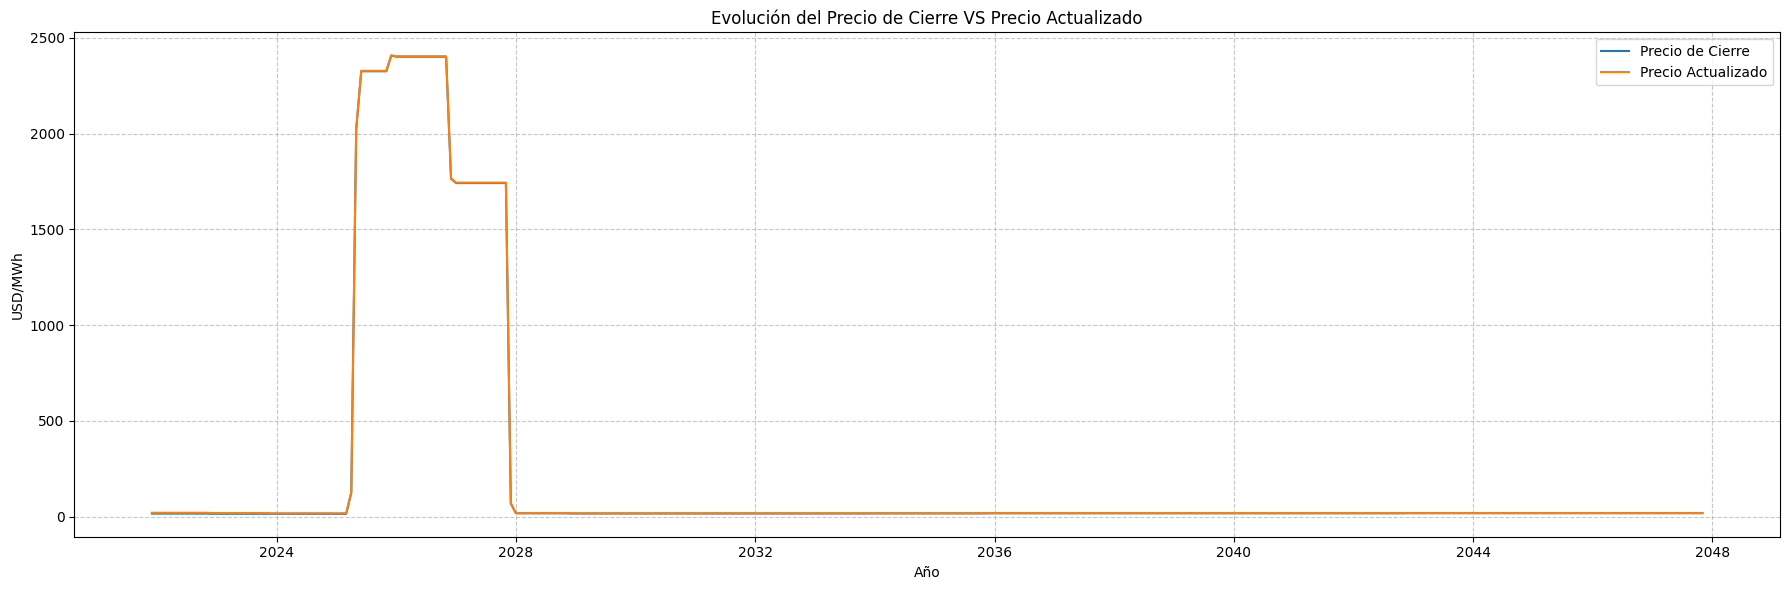

In [11]:
df_diario = expandir_fechas(df_completo, "FechaInicioObligacion", "FechaFinObligacion", ["PrecioCierre", "PrecioActualizado"])  # Se crea un DataFrame con los registros diarios

df_diario["Mes"] = df_diario["Fecha"].dt.to_period("M").dt.to_timestamp()       # Se agrupa por mes y se calcula el promedio de los precios
df_precio = ( 
    df_diario.groupby("Mes", as_index=False)
               .mean(numeric_only=True)
)

# Se crea el objeto de gráfica
plt.figure(figsize=(18, 6))  # Tamaño del gráfico

# Se configura gráfica de línea para Precio de Cierre
plt.plot(
    df_precio["Mes"],                 # Valores Eje X
    df_precio["PrecioCierre"],        # Valores Eje Y
    label='Precio de Cierre',         # Nombre de la línea
    linestyle='-',                    # Estilo de línea
)

# Se configura gráfica de línea para Precio Actualizado
plt.plot(
    df_precio["Mes"],                 # Valores Eje X
    df_precio["PrecioActualizado"],   # Valores Eje Y
    label='Precio Actualizado',       # Nombre de la línea
    linestyle='-',                    # Estilo de línea
)

# Se configura el gráfico
plt.title("Evolución del Precio de Cierre VS Precio Actualizado")  # Título del gráfico
plt.xlabel("Año")                                                  # Título Eje X
plt.ylabel("USD/MWh")                                              # Título Eje Y
plt.legend()                                                       # Mostrar leyenda
plt.grid(True, linestyle='--', alpha=0.7)                          # Líneas de guía

plt.tight_layout()  # Ajuste automático del diseño
plt.show()          # Se muestra el gráfico

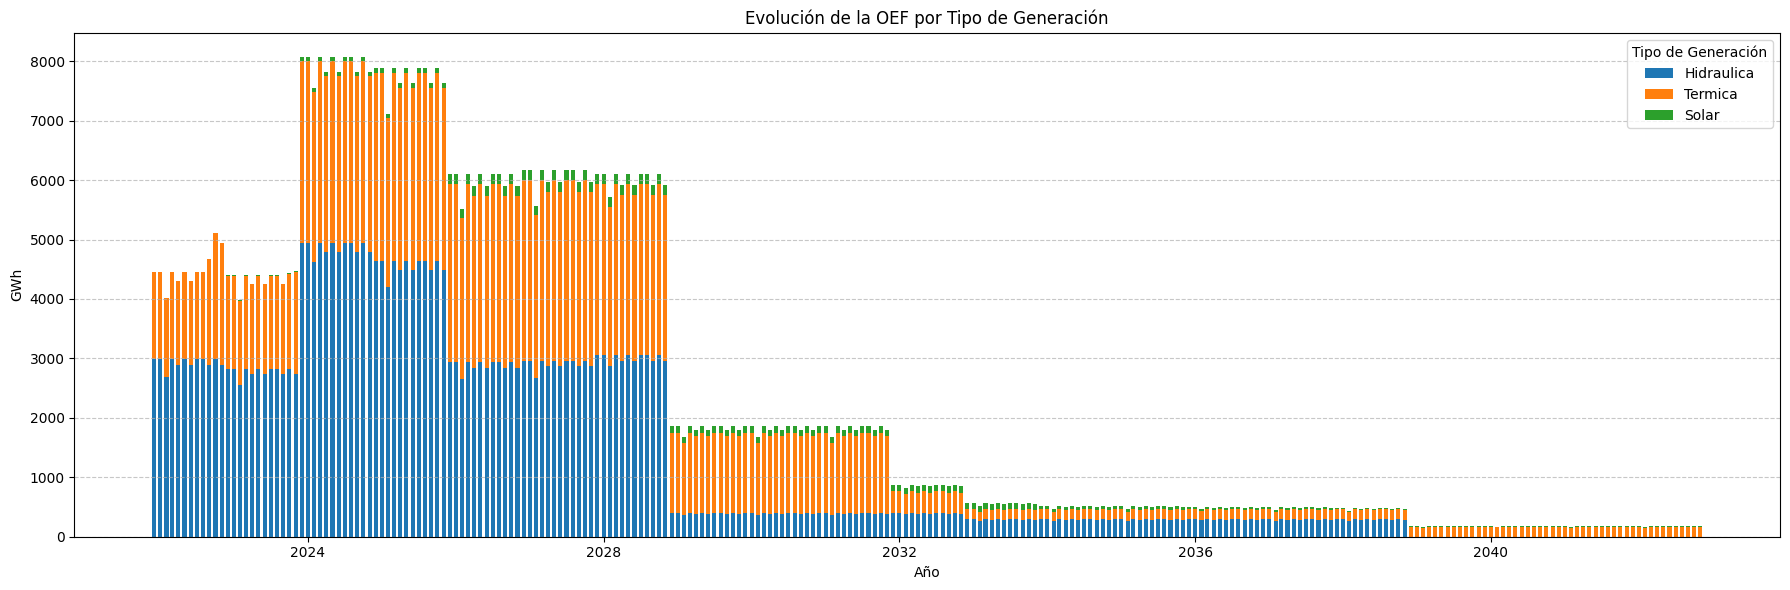

In [12]:
df_diario_oef = expandir_fechas(df_completo, "FechaInicioObligacion", "FechaFinObligacion", ["OEFDiaria", "TipoGeneracion", "TipoSubasta"])  # Se crea un DataFrame con los registros diarios

df_diario_oef["Mes"] = df_diario_oef["Fecha"].dt.to_period("M").dt.to_timestamp()               # Se agrupa por mes y se calcula la oef
df_oef_tipoG = df_diario_oef.groupby(["Mes", "TipoGeneracion"])["OEFDiaria"].sum().reset_index()     
df_oef_tipoG['OEFDiaria'] = df_oef_tipoG['OEFDiaria']/1000000                                   # Se pasa a Gwh como unidad de medida

# Agrupar los datos por tipo de generación
tipos = df_oef_tipoG["TipoGeneracion"].dropna().unique()  # Obtener los tipos únicos de generación

# Crear la figura de Matplotlib
plt.figure(figsize=(18, 6))  # Tamaño del gráfico

# Inicializar el acumulador para apilar las barras
bottom = pd.Series([0] * len(df_oef_tipoG["Mes"].unique()), index=sorted(df_oef_tipoG["Mes"].unique()))

# Se añade una barra por cada tipo de generación
for tipo in tipos:
    tipo_data = df_oef_tipoG[df_oef_tipoG["TipoGeneracion"] == tipo]
    tipo_data = tipo_data.groupby("Mes")["OEFDiaria"].sum().reindex(bottom.index).fillna(0)

    plt.bar(
        bottom.index,              # Valores Eje X
        tipo_data,                 # Valores Eje Y
        bottom=bottom,             # Acumulador para apilar las barras
        label=tipo,                # Nombre de la barra
        width=20                   # Grosor
    )
    bottom += tipo_data            # Actualizar el acumulador

# Se configura el diseño del gráfico
plt.title("Evolución de la OEF por Tipo de Generación")  # Título del gráfico
plt.xlabel("Año")                                        # Título Eje X
plt.ylabel("GWh")                                        # Título Eje Y
plt.legend(title="Tipo de Generación")                   # Mostrar leyenda
plt.grid(axis='y', linestyle='--', alpha=0.7)            # Líneas de guía en el eje Y

plt.tight_layout()  # Ajuste automático del diseño
plt.show()          # Se muestra el gráfico

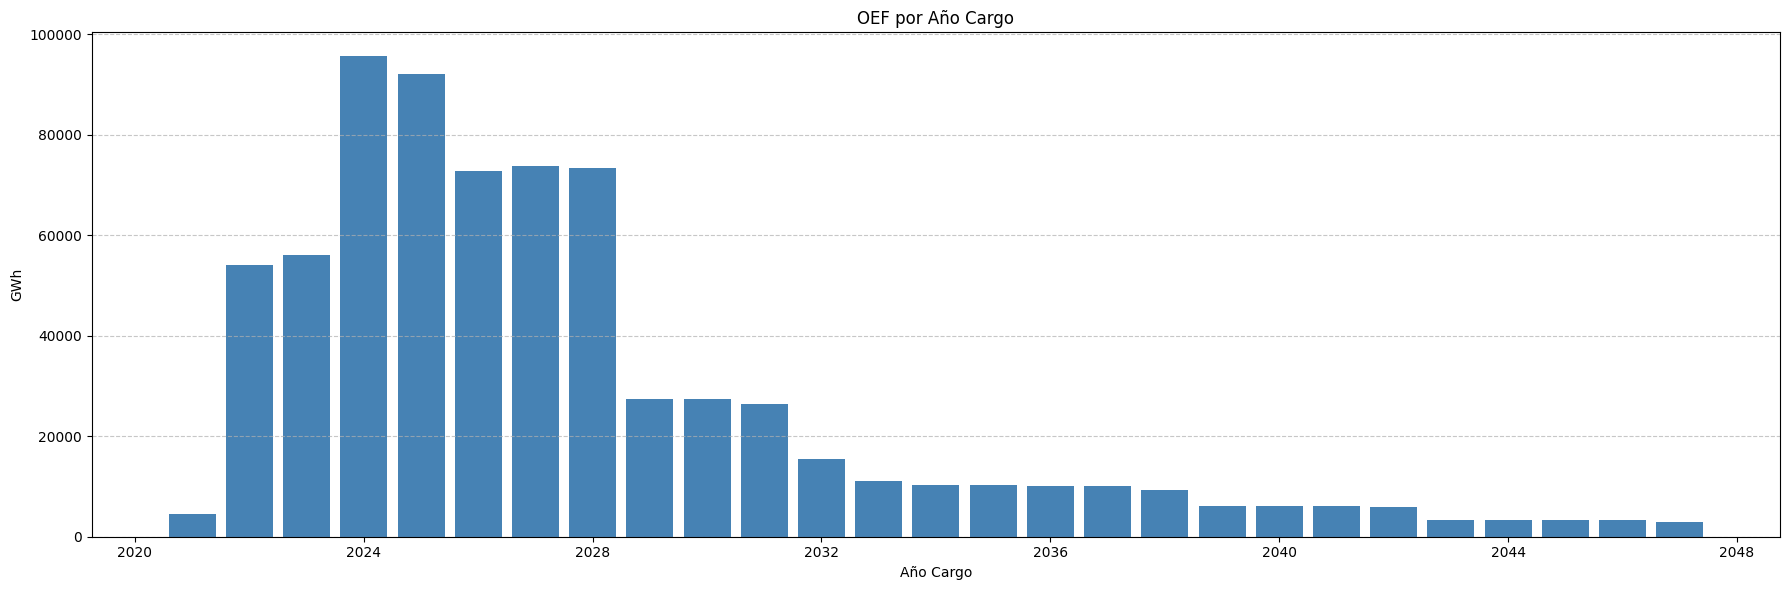

In [13]:
df_diario_oef["Año"] = df_diario_oef["Fecha"].dt.to_period("Y").dt.to_timestamp()   # Se agrupa por año y se calcula la oef
df_año_cargo = df_diario_oef.groupby(["Año"])["OEFDiaria"].sum().reset_index()     
df_año_cargo['OEFDiaria'] = df_año_cargo['OEFDiaria']/1000000                       # Se pasa a Gwh como unidad de medida

# Se crea el objeto de gráfica
plt.figure(figsize=(18, 6))  # Tamaño del gráfico

# Se añade gráfico de barras
plt.bar(
    df_año_cargo["Año"],         # Valores Eje X
    df_año_cargo["OEFDiaria"],   # Valores Eje Y
    color='steelblue',           # Color del gráfico (puedes ajustarlo si deseas)
    width=300                    # Grosor
)

# Se configura el diseño del gráfico
plt.title("OEF por Año Cargo")                      # Título del gráfico
plt.xlabel("Año Cargo")                             # Título Eje X
plt.ylabel("GWh")                                   # Título Eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)       # Líneas de guía en el eje Y

plt.tight_layout()  # Ajuste automático del diseño
plt.show()          # Se muestra el gráfico

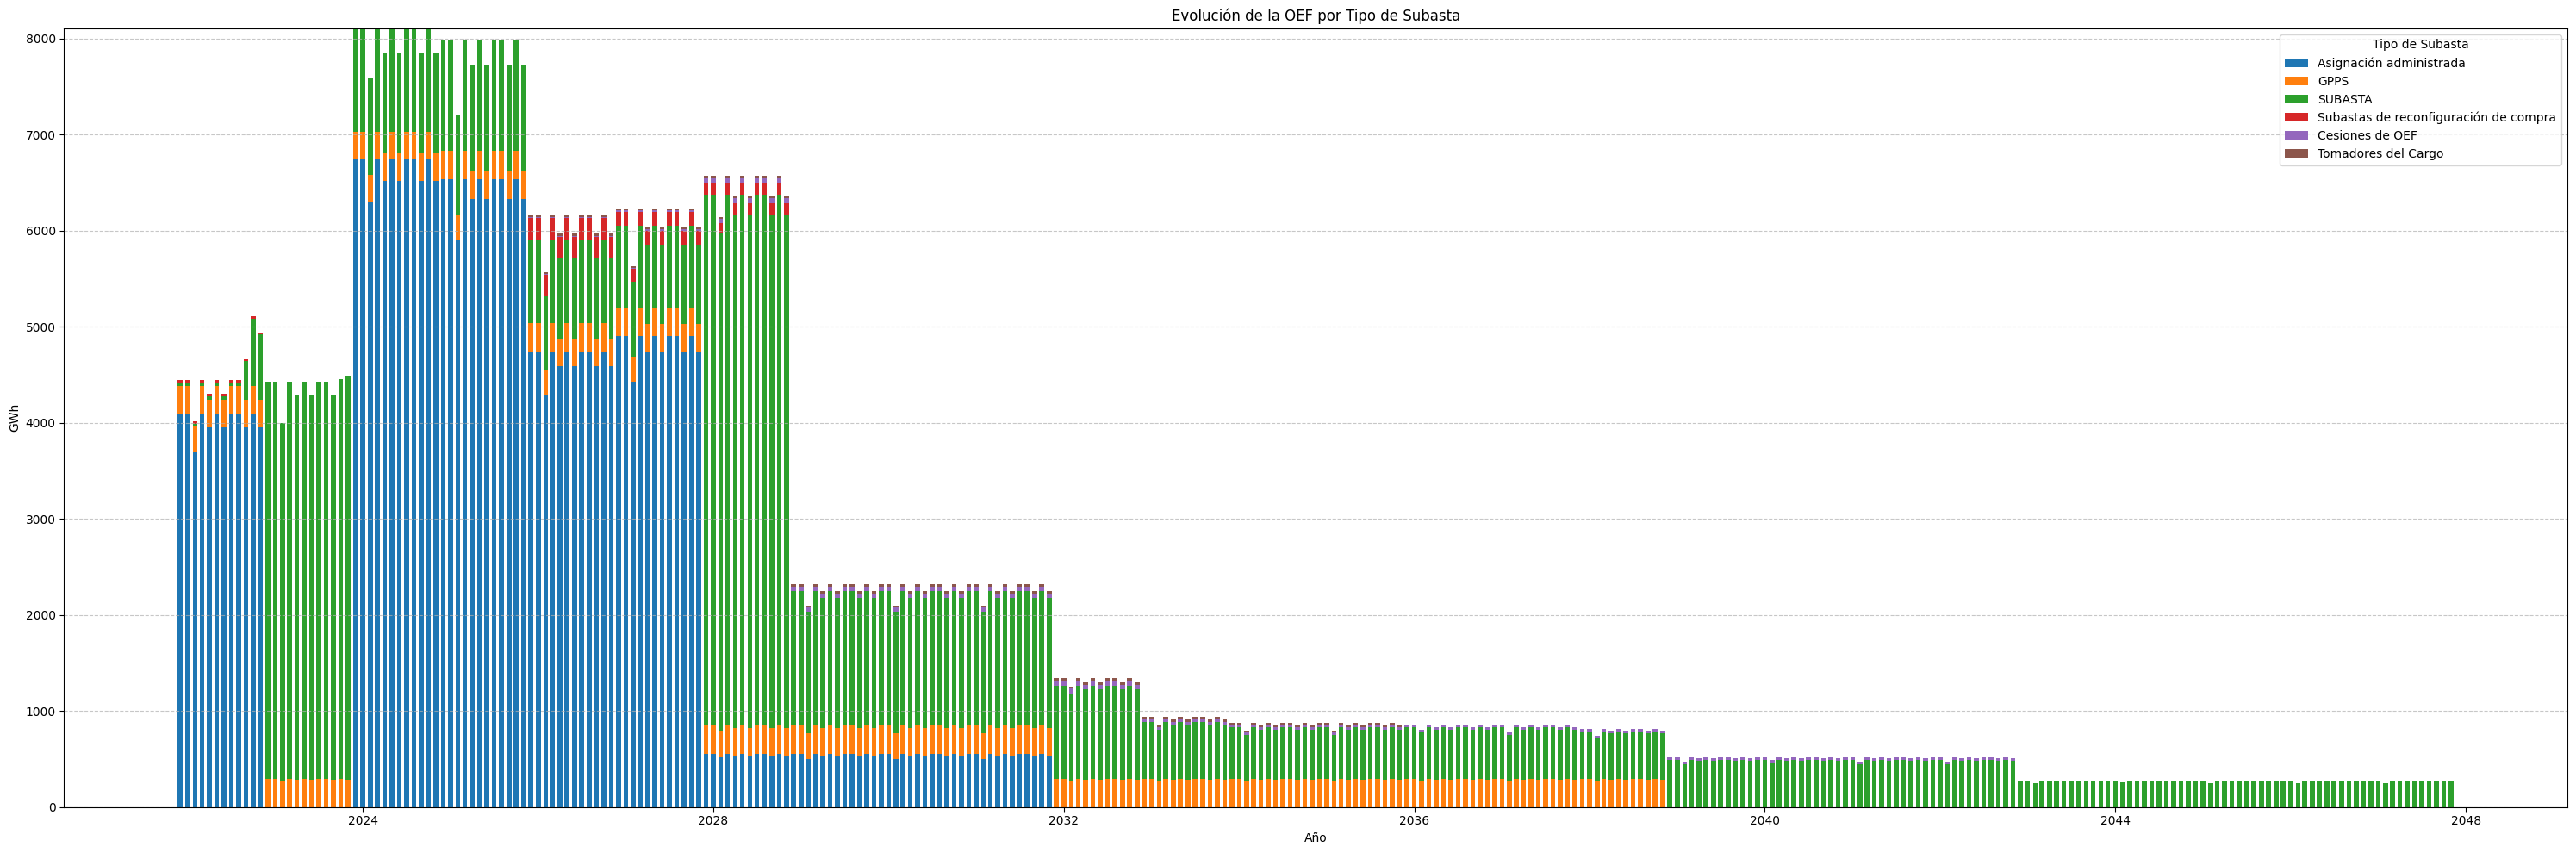

In [14]:
df_oef_tipoS = df_diario_oef.groupby(["Mes", "TipoSubasta"])["OEFDiaria"].sum().reset_index()     
df_oef_tipoS['OEFDiaria'] = df_oef_tipoS['OEFDiaria']/1000000                                   # Se pasa a Gwh como unidad de medida

# Agrupar los datos por tipo de subasta
tipos = df_oef_tipoS["TipoSubasta"].dropna().unique()  # Obtener los tipos únicos de subasta

# Crear la figura de Matplotlib
plt.figure(figsize=(30, 10))  # Tamaño del gráfico

# Inicializar el acumulador para apilar las barras
bottom = pd.Series([0] * len(df_oef_tipoS["Mes"].unique()), index=sorted(df_oef_tipoS["Mes"].unique()))

# Se añade una barra por cada tipo de subasta
for tipo in tipos:
    tipo_data = df_oef_tipoS[df_oef_tipoS["TipoSubasta"] == tipo]
    tipo_data = tipo_data.groupby("Mes")["OEFDiaria"].sum().reindex(bottom.index).fillna(0)

    plt.bar(
        bottom.index,              # Valores Eje X
        tipo_data,                 # Valores Eje Y
        bottom=bottom,             # Acumulador para apilar las barras
        label=tipo,                # Nombre de la barra
        width=20                   # Grosor
    )
    bottom += tipo_data            # Actualizar el acumulador

# Se configura el diseño del gráfico
plt.title("Evolución de la OEF por Tipo de Subasta")  # Título del gráfico
plt.xlabel("Año")                                     # Título Eje X
plt.ylabel("GWh")                                     # Título Eje Y
plt.legend(title="Tipo de Subasta")                   # Mostrar leyenda
plt.grid(axis='y', linestyle='--', alpha=0.7)         # Líneas de guía en el eje Y

plt.tight_layout()  # Ajuste automático del diseño
plt.show()          # Se muestra el gráfico